In [1]:
from label_names import *
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

path = os.getcwd()
if path.split('/')[-1] == 'notebooks':
    os.chdir('..')

In [2]:
from src.engine import Engine
from src.core.criterions import *
from src.utils.util import *
%matplotlib inline

# Load a model

In [3]:
config_path = 'configs/mln_resnet18_imagenet.yml'
save_dir = '/home/yo0n/바탕화면/RIL/ucam/notebook_test'
logger = load_log(save_dir)
checkpoint_path = '/home/yo0n/바탕화면/RIL/ucam/ckpt_imagenet/checkpoint_best.pth'

In [4]:
engine = Engine(config_path, logger, save_dir,device='cuda')
engine.model_config['checkpoint_path'] = checkpoint_path
engine.define()


[2021-09-12 21:59:27,651 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] GPU is available.


Build a dataloader
Build a model


[2021-09-12 21:59:32,127 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] SGD opimizer is built.
[2021-09-12 21:59:32,127 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] CUSTOM scheduler is built.
[2021-09-12 21:59:32,132 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Criterion is built.
[2021-09-12 21:59:32,132 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Loss meter is built.
[2021-09-12 21:59:32,133 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Checkpointer is built.
[2021-09-12 21:59:32,133 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Loading checkpoint from /home/yo0n/바탕화면/RIL/ucam/ckpt_imagenet/checkpoint_best.pth
[2021-09-12 21:59:32,232 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Localizer is built.
[2021-09-12 21:59:32,233 - /home/yo0n/바탕화면/RIL/ucam/notebook_test] Evaluators are built.


In [5]:
sample = iter(engine.dataloaders['train']).next()
print(sample)

/home/yo0n/.local/lib/python3.8/site-packages/torch/nn/functional.py:3213: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/yo0n/.local/lib/python3.8/site-packages/torch/nn/functional.py:3213: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/yo0n/.local/lib/python3.8/site-packages/torch/nn/functional.py:3213: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate instead.")
/home/yo0n/.local/lib/python3.8/site-packages/torch/nn/functional.py:3213: UserWarning: nn.functional.upsample_nearest is deprecated. Use nn.functional.interpolate inste

[tensor([[[[-0.0972,  0.1939,  0.7077,  ...,  0.3652,  0.2796,  0.2624],
          [ 0.0741,  0.1083,  0.5536,  ...,  0.2796,  0.2796,  0.2967],
          [ 0.2624,  0.0741,  0.3823,  ...,  0.2624,  0.3481,  0.3652],
          ...,
          [ 1.0331,  1.0673,  1.1529,  ..., -0.5767, -0.1143, -0.0116],
          [ 1.1358,  1.1015,  1.1700,  ...,  0.2111, -0.4054, -1.2959],
          [ 1.1015,  1.1358,  1.1872,  ..., -0.4739, -1.2445, -1.7583]],

         [[-0.0924,  0.2227,  0.6779,  ...,  0.4503,  0.3627,  0.3452],
          [ 0.0651,  0.1176,  0.5203,  ...,  0.3627,  0.3803,  0.3803],
          [ 0.2227,  0.0826,  0.4153,  ...,  0.3627,  0.4328,  0.4328],
          ...,
          [ 0.8880,  0.9580,  1.0280,  ..., -0.9328, -0.4776, -0.1099],
          [ 1.0105,  0.9580,  1.0280,  ..., -0.0399, -0.6176, -1.5105],
          [ 0.9755,  1.0105,  1.0630,  ..., -0.6877, -1.4755, -1.8782]],

         [[-0.4798, -0.1138,  0.3916,  ...,  0.4788,  0.3742,  0.3568],
          [-0.3055, -0.2707, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


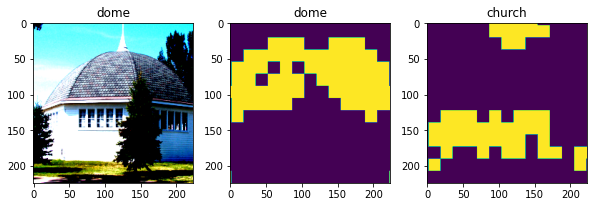

In [13]:
batch_num=156

counts = torch.unique(sample[2][batch_num][1,0], return_counts=True)
rank = counts[0][torch.argsort(counts[1],descending=True)]

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.title(label_name[int(sample[1][batch_num])])
plt.imshow(sample[0][batch_num].permute(1,2,0) + torch.tensor([[0.485, 0.456, 0.406]]) )
plt.subplot(3,3,2)
plt.title(engine.dataloaders['train'].dataset.clsidx_to_labels[int(rank[0])].split(',')[0])
plt.imshow(sample[2][batch_num][1,0]==rank[0])
plt.subplot(3,3,3)
plt.title(engine.dataloaders['train'].dataset.clsidx_to_labels[int(rank[1])].split(',')[0])
plt.imshow(sample[2][batch_num][1,0]==rank[1])
plt.show()

###### rank

In [14]:
pd =list()
for k in rank:
    print(k,torch.sum(sample[2][batch_num][1,0]==int(k))/(224.*224.))
    pd.append(torch.sum(sample[2][batch_num][1,0]==int(k))/(224.*224.))

print(torch.sum(torch.tensor(pd)))
print(sum(pd))
eps = 1-np.sum(np.array([float(p) for p in pd]))
pd[0] += eps
print(sum(pd))
    
from numpy.random import choice
draw = choice([int(i) for i in rank], 1, p=np.array([p for p in pd]))

print(draw)

tensor(538.) tensor(0.3537)
tensor(497.) tensor(0.2463)
tensor(660.) tensor(0.0464)
tensor(727.) tensor(0.0403)
tensor(908.) tensor(0.0329)
tensor(961.) tensor(0.0303)
tensor(937.) tensor(0.0241)
tensor(974.) tensor(0.0193)
tensor(630.) tensor(0.0173)
tensor(795.) tensor(0.0173)
tensor(404.) tensor(0.0173)
tensor(975.) tensor(0.0146)
tensor(1.) tensor(0.0125)
tensor(557.) tensor(0.0125)
tensor(437.) tensor(0.0122)
tensor(904.) tensor(0.0115)
tensor(977.) tensor(0.0115)
tensor(339.) tensor(0.0115)
tensor(755.) tensor(0.0115)
tensor(832.) tensor(0.0058)
tensor(703.) tensor(0.0058)
tensor(506.) tensor(0.0058)
tensor(549.) tensor(0.0058)
tensor(444.) tensor(0.0058)
tensor(449.) tensor(0.0058)
tensor(990.) tensor(0.0058)
tensor(562.) tensor(0.0058)
tensor(682.) tensor(0.0058)
tensor(624.) tensor(0.0010)
tensor(976.) tensor(0.0010)
tensor(767.) tensor(0.0010)
tensor(738.) tensor(0.0007)
tensor(831.) tensor(0.0007)
tensor(970.) tensor(0.0004)
tensor(510.) tensor(0.0003)
tensor(1.0000)
tensor(

In [35]:
target_relabel.shape

torch.Size([2, 5, 224, 224])

In [ ]:
cat_and_dog =img = Image.open("./data/notebook/cat_and_dog.png")
cat_and_dog = cat_and_dog.resize((224, 224), Image.ANTIALIAS)
plt.imshow(cat_and_dog)

/home/yo0n/.local/lib/python3.8/site-packages/torch/nn/functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


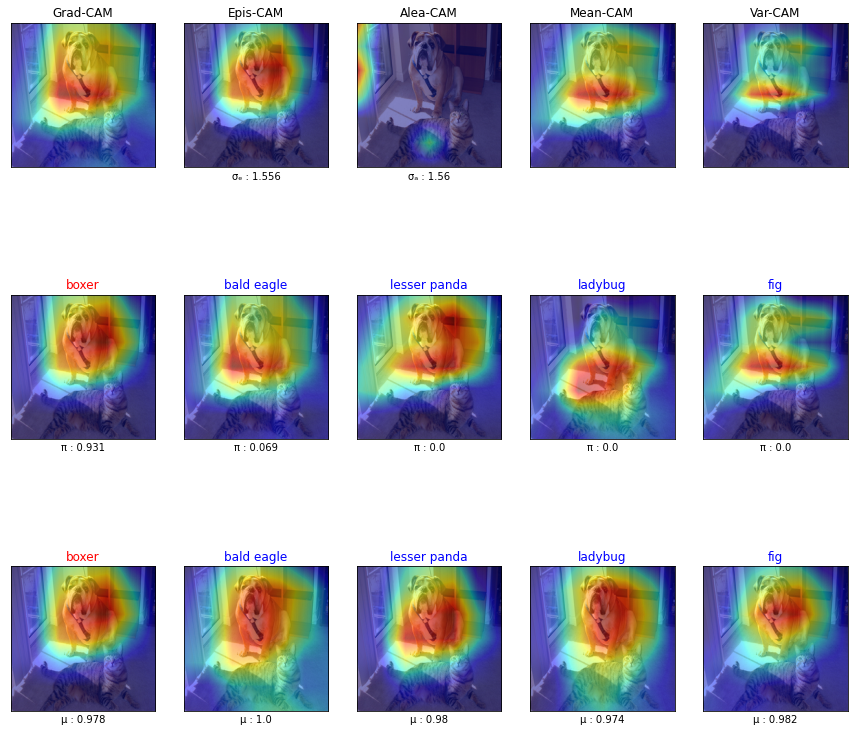

In [6]:
plot_func(engine, cat_and_dog)

## CutOut Images

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


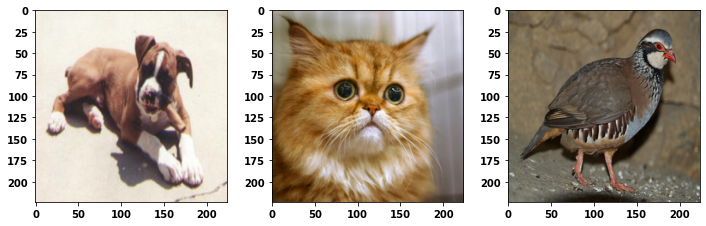

In [7]:
dog_img = Image.open("/sdb/ImageNet1K/train/n02108089/n02108089_315.JPEG")
dog_img = dog_img.resize((224, 224), Image.ANTIALIAS)

cat_img = Image.open("/sdb/ImageNet1K/train/n02123394/n02123394_274.JPEG")
cat_img = cat_img.resize((224, 224), Image.ANTIALIAS)

bird_img = Image.open("/sdb/ImageNet1K/train/n01797886/n01797886_35.JPEG")
bird_img = bird_img.resize((224, 224), Image.ANTIALIAS)

plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
plt.imshow(dog_img)
plt.subplot(3,3,2)
plt.imshow(cat_img)
plt.subplot(3,3,3)
plt.imshow(bird_img)

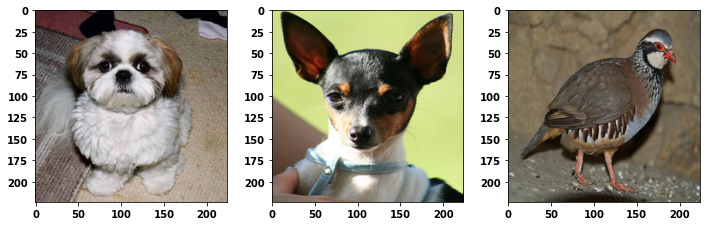

In [8]:
dog_img2 = Image.open("/sdb/ImageNet1K/train/n02086240/n02086240_146.JPEG")
dog_img2 = dog_img2.resize((224, 224), Image.ANTIALIAS)

dog_img3 = Image.open("/sdb/ImageNet1K/train/n02087046/n02087046_436.JPEG")
dog_img3 = dog_img3.resize((224, 224), Image.ANTIALIAS)

bird_img = Image.open("/sdb/ImageNet1K/train/n01797886/n01797886_35.JPEG")
bird_img = bird_img.resize((224, 224), Image.ANTIALIAS)

plt.figure(figsize=(12,12)) 
plt.subplot(3,3,1)
plt.imshow(dog_img2)
plt.subplot(3,3,2)
plt.imshow(dog_img3)
plt.subplot(3,3,3)
plt.imshow(bird_img)

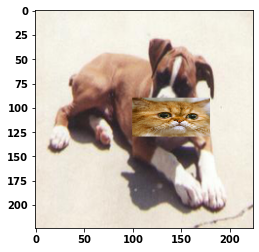

In [9]:
def cutout_func(img1, img2, bbox1, bbox2):
    patch = img2[bbox2[0]:bbox2[2], bbox2[1]:bbox2[3]]
    patch = cv2.resize(patch, dsize=(bbox1[3]-bbox1[1], bbox1[2]-bbox1[0]), interpolation=cv2.INTER_CUBIC)
    img1[bbox1[0]:bbox1[2], bbox1[1]:bbox1[3]] = patch
    
    #plt.subplot(2,2,1)
    #plt.imshow(img1[bbox1[0]:bbox1[2], bbox1[1]:bbox1[3]])
    #plt.subplot(2,2,2)
    #plt.imshow(patch)
    
    return img1

#img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,130,180],[20,20,180,180])
#img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,90,180],[20,20,180,180])
img_cutout = cutout_func(np.array(dog_img), np.array(cat_img), [90,100,130,180],[20,20,180,180])
#img_cutout = cutout_func(np.array(cat_img), np.array(dog_img), [50,50,150,150],[30,130,160,160])
plt.imshow(img_cutout)

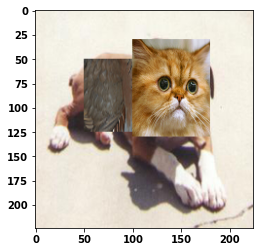

In [10]:
img_cutout2 = cutout_func(np.array(dog_img), np.array(cat_img), [30,100,130,180],[20,20,180,180])
img_cutout2 = cutout_func(np.array(img_cutout2), np.array(bird_img), [50,50,125,100],[75,75,130,160])

plt.imshow(img_cutout2)

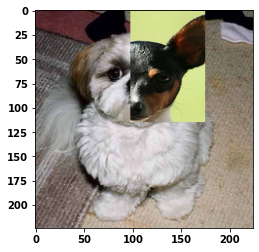

In [11]:
#img_cutout3 = cutout_func(np.array(dog_img), np.array(bird_img), [25,110,125,185],[25,165,80,201])
#img_cutout3 = cutout_func(np.array(dog_img), np.array(bird_img), [80,110,155,185],[25,165,80,201])

img_cutout3 = cutout_func(np.array(dog_img2), np.array(dog_img3), [1,98,115,175],[1,100,165,200])
#img_cutout3 = cutout_func(np.array(dog_img2), np.array(dog_img3), [5,5,60,210],[0,0,80,240])
plt.imshow(img_cutout3)

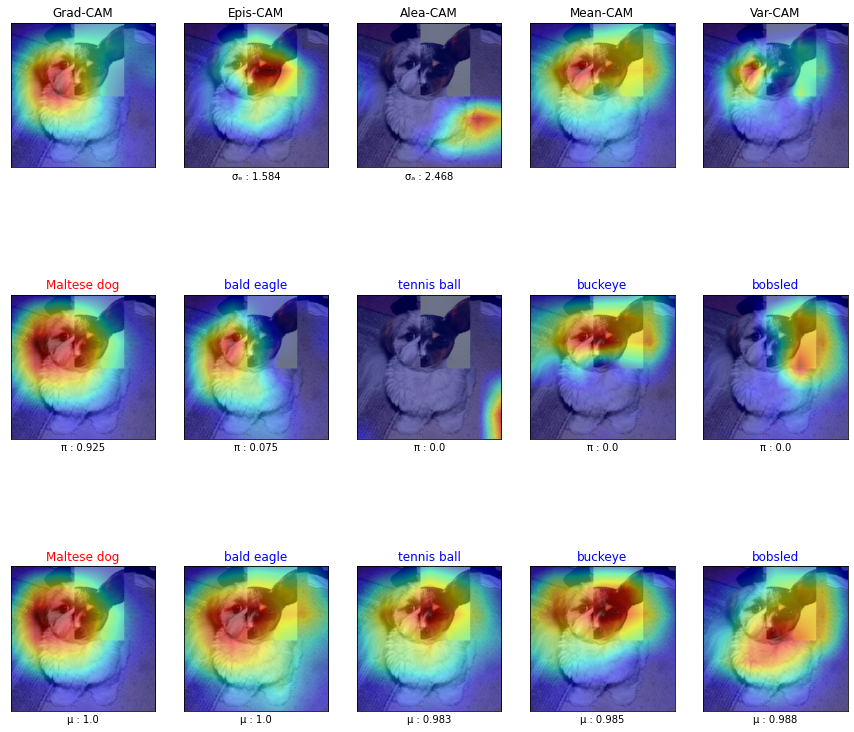

In [13]:
plot_func(engine, img_cutout3, save_path = "./dogs_face_cutout.pdf")

## ImageNet CAMs

In [11]:

output_dict = engine.model(inpt.cuda().float())
criterion = MaceCriterion(num_classes=1000, device='cuda', is_multilabel=False)
output_dict['labels'] = cat_label

loss_dict = criterion(output_dict)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

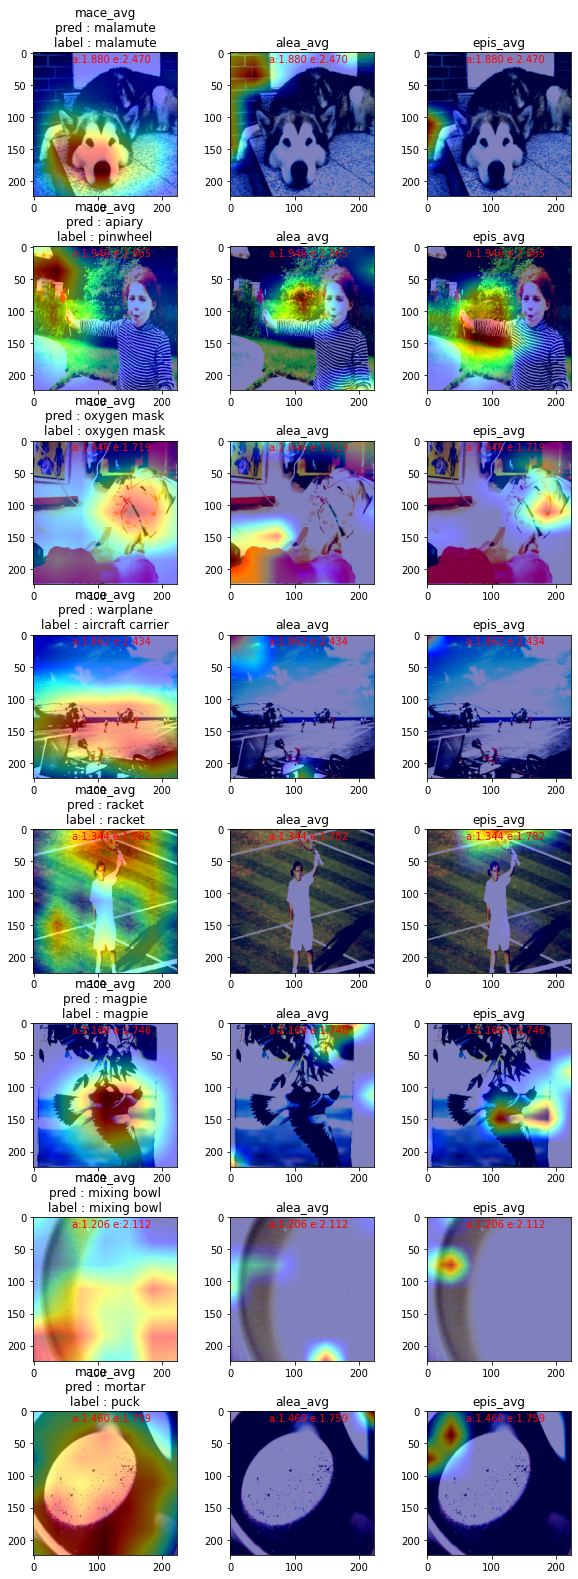

In [12]:
import random 

loss_types = ['mace_avg','alea_avg','epis_avg']

img,label,_ = iter(engine.dataloaders['train']).next()

bs = img.shape[0]
with torch.no_grad():
    output_dict = engine.model(img.cuda())
pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']
unct_out = mln_uncertainties(pi, mu, sigma)
sel_out = mln_gather(output_dict)
mu_sel = sel_out['mu_sel']
ind_sel = torch.topk(mu_sel,3,dim=-1)[-1]

plt.figure(figsize=(10,80))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
l = [i for i in range(bs)]
random.shuffle(l)

for j,ind in enumerate(l[:8]):
    for i,loss_type in enumerate(loss_types):
        
        engine.model.eval()
        engine.localizer.register_hooks()
        engine.localizer.model_ext.loss_type= loss_type
        
        pred_label = torch.tensor([ind_sel[ind,0]]).long()
    
        cams = engine.localizer.localize(img[ind].unsqueeze(0).to('cuda').float(),  ind_sel[ind,0].unsqueeze(0).to('cuda'))
        cams = cams.cpu().detach().squeeze().numpy()
        
        epis = unct_out['epis'][j]
        alea = unct_out['alea'][j]
        
        plt.subplot(8*3,3,3*j+i+1)
        if loss_type=='mace_avg':
            pred_name = label_name[ind_sel[ind,0]].split(',')[0]
            label_ = label_name[label[ind]].split(',')[0]
            plt.title(loss_type + '\npred : ' + pred_name + '\nlabel : ' + label_)
        else:
            plt.title(loss_type)
        plt.imshow(img[ind].permute(1,2,0).numpy() + np.array([0.5,0.5,0.5]))
        plt.imshow(cams, alpha=0.5, cmap='jet')
        plt.text(60, 15, "a:{:.3f} e:{:.3f}".format(alea,epis), fontsize=10,color='red')
        
        engine.localizer.remove_hooks()

## VOC Confusion matrix

In [18]:
from src.core.datasets import *
from torch.utils.data import DataLoader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 background (40866,)
12 dog (2307,)
17 sheep (4371,)


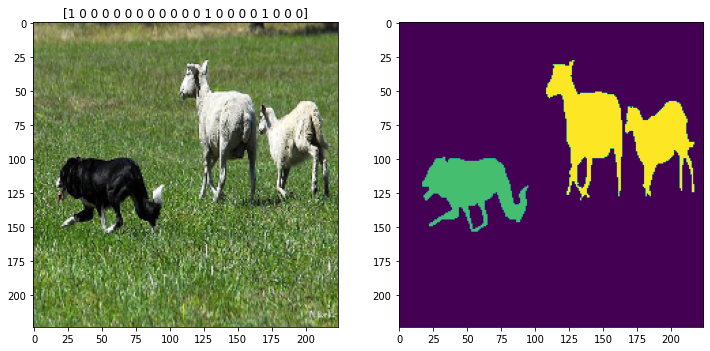

In [244]:
voc_dataset = VOC2012(root = "./data/VOCdevkit", crop_size=224 ,metadata_split='val',scale=False, flip=False)
voc_loader  = DataLoader(voc_dataset, batch_size=32, shuffle=True)

voc_sample_img, voc_sample_label, voc_sample_mask = voc_dataset[433]

voc_sample_img = (voc_sample_img.transpose(1,2,0)/255.+ voc_dataset.mean_bgr/255.)[:,:,::-1]

for i in list(np.where(voc_sample_label==1)[0]):
    print(i,voc_label_names[i],np.where(voc_sample_mask==i)[0].shape)

plt.figure(figsize=(12,24))
plt.subplot(2,2,1)
plt.title(voc_sample_label)
plt.imshow(voc_sample_img)
plt.subplot(2,2,2)
plt.imshow( np.where(voc_sample_mask==255,0,voc_sample_mask) )

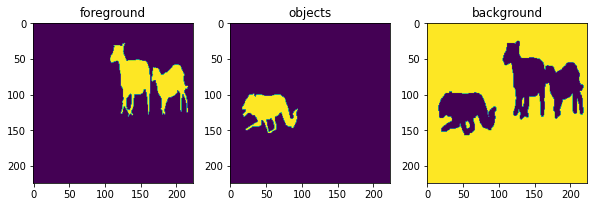

In [239]:
seg_label = np.where(voc_sample_mask==255,0,voc_sample_mask)

def divide_mask(seg_label):
    space = 0
    foreground_idx = -1
    for i in list(np.where(voc_sample_label==1)[0]):
        if(i==0):
            continue
        if( np.where(voc_sample_mask==i)[0].shape[0] > space):
            space = np.where(voc_sample_mask==i)[0].shape[0]
            foreground_idx = i

    foreground = (seg_label==foreground_idx)
    objects = ((seg_label!=foreground_idx) * (seg_label!=0))
    background = (voc_sample_mask==0)
    
    return foreground,objects,background

foreground,objects,background = divide_mask(seg_label)

plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.title("foreground")
plt.imshow(foreground )
plt.subplot(3,3,2)
plt.title("objects")
plt.imshow(objects )
plt.subplot(3,3,3)
plt.title("background")
plt.imshow(background )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


llama tensor(0.1192)
warthog tensor(0.1133)
gazelle tensor(0.0458)
bighorn tensor(0.0454)
ram tensor(0.0447)
0.0026196237
0.0
0.0


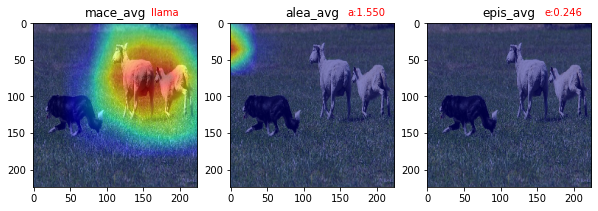

In [240]:
inp = np.array(voc_sample_img*255) - np.array((104.008, 116.669, 122.675))
inp = torch.tensor(inp)/255.
inpt = inp.permute(2,0,1).unsqueeze(0)

with torch.no_grad():
    output_dict = engine.model(inpt.cuda().float())
pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']
unct_out = mln_uncertainties(pi, mu, sigma)
alea , epis = float(unct_out['alea']), float(unct_out['epis'])
sel_out = mln_gather(output_dict)
mu_sel = sel_out['mu_sel'].cpu()
ind_sel = torch.topk(mu_sel,5)[-1][0]
largest_pi_ind = torch.argmax(pi)

for i in ind_sel:
    print(label_name[int(i)].split(',')[0], mu_sel[0,i])

mixture_pred_name = label_name[int(torch.argmax(mu_sel))].split(',')[0]

cam_saver = None
plt.figure(figsize=(10,30))
for i,loss_type in enumerate(loss_types):
        
    engine.localizer.register_hooks()
    engine.localizer.model_ext.loss_type= loss_type
    
    cat_label = torch.tensor([ind_sel[0]]).long()
    #cat_label = torch.tensor([895]).long()
    
    cams = engine.localizer.localize(inpt.to('cuda').float(), cat_label.to('cuda'), largest_pi_ind)
    cams = cams.cpu().detach().squeeze().numpy()
    
    print(np.median(cams))
    plt.subplot(3,3,i+1)
    plt.title(loss_type)
    plt.imshow(voc_sample_img)
    plt.imshow(cams, alpha=0.5, cmap='jet')
    if(loss_type=='alea_avg'):
        plt.text(160, -10, "a:{:.3f}".format(alea), fontsize=10, color='red')
    elif(loss_type=='epis_avg'):
        plt.text(160, -10, "e:{:.3f}".format(epis), fontsize=10, color='red')
    elif(loss_type=='mace_avg'):
        cam_saver = cams
        plt.text(160, -10, mixture_pred_name , fontsize=10, color='red')
    
    engine.localizer.remove_hooks()

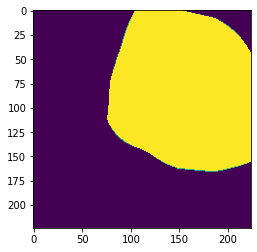

In [245]:
plt.imshow(cam_saver > np.mean(cam_saver))

calculate CAM confusion matrix

In [194]:
confusion_mat = np.zeros((3,3))

for idx,(voc_sample_img, voc_sample_label, voc_sample_mask) in enumerate(voc_dataset):
    voc_sample_img = (voc_sample_img.transpose(1,2,0)/255.+ voc_dataset.mean_bgr/255.)[:,:,::-1]
    inp = np.array(voc_sample_img*255) - np.array((104.008, 116.669, 122.675))
    inp = torch.tensor(inp)/255.
    voc_sample_mask = np.where(voc_sample_mask==255,0,voc_sample_mask)
    
    inpt = inp.permute(2,0,1).unsqueeze(0)
    
    voc_labels = list(np.where(voc_sample_label==1)[0]) 
    
    foreground_mask,objects_mask,background_mask = divide_mask(voc_sample_mask)
    masks = [foreground_mask,objects_mask,background_mask]
    
    # calc prediction, uncertainty
    with torch.no_grad():
        output_dict = engine.model(inpt.cuda().float())
    pi, mu, sigma = output_dict['pi'],output_dict['mu'],output_dict['sigma']
    largest_pi_ind = torch.argmax(pi)
    unct_out = mln_uncertainties(pi, mu, sigma)
    alea , epis = float(unct_out['alea']), float(unct_out['epis'])
    sel_out = mln_gather(output_dict)
    mu_sel = sel_out['mu_sel'].cpu()
    ind_sel = torch.topk(mu_sel,5)[-1][0]
    
    # calc cam
    for i,loss_type in enumerate(loss_types):
        
        engine.localizer.register_hooks()
        engine.localizer.model_ext.loss_type= loss_type

        pred_label = torch.tensor([ind_sel[0]]).long()
        
        cams = engine.localizer.localize(inpt.to('cuda').float(), pred_label.to('cuda'),largest_pi_ind)
        cams = cams.cpu().detach().squeeze().numpy()

        engine.localizer.remove_hooks()
        
        for m,mask in enumerate(masks):
            iou = 0.
            union = np.bitwise_or(mask, cams > np.mean(cams))
            intersection = np.bitwise_and(mask,cams > np.mean(cams))
            if(np.sum(union)!=0):
                iou = np.sum(intersection)/np.sum(union)
            #iou= iou/(255.*255.)
            if(loss_type=='mace_avg'):
                confusion_mat[0,m] += iou
            elif(loss_type=='alea_avg'):
                confusion_mat[1,m] += iou
            elif(loss_type=='epis_avg'):
                confusion_mat[2,m] += iou

In [195]:
confusion_mat[0,:]

array([384.6613719 ,  43.91162956, 424.22920502])

<AxesSubplot:>

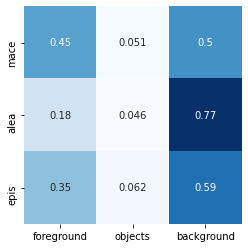

In [196]:
import seaborn as sns

for i in range(3):
    confusion_mat[i,:] /= np.sum(confusion_mat[i,:])

sns.heatmap(confusion_mat, square=True, cbar=False, annot=True, cmap='Blues',\
           xticklabels=['foreground','objects','background'],
           yticklabels=['mace','alea','epis'])

## Mask Out

In [16]:
import numpy as np

loss_types = ['mace_avg','alea_avg','epis_avg']

confusion_matrix = np.zeros((21,3))
total_images = 0

for i, (images, labels, seglabel) in enumerate(engine.dataloaders['val']):
    total_images += images.size(0)
    
    for i,loss_type in enumerate(loss_types):
        engine.localizer.register_hooks()
        engine.localizer.model_ext.loss_type= loss_type
        
        cams = engine.localizer.localize(images.to('cuda'), labels.to('cuda')) # [B X 1 X W X H]
        
        masks = cams > cams.mean(dim=[1,2,3]).view(-1,1,1,1) # [B X 1 X W X H]
        cams = cams.detach().cpu().numpy() # [B X 1 X W X H]
        masks = masks.detach().cpu().numpy()
        
        seglabel = np.where(seglabel==255, 0, seglabel)

        for b in range(images.size(0)):
            for c in range(21):
                union = np.bitwise_or(masks[b].squeeze(),seglabel[b].squeeze()==c)
                intersection = np.bitwise_and(masks[b].squeeze(),seglabel[b].squeeze()==c)
                
                if np.sum(union)==0:
                    confusion_matrix[c,i] += 0
                else:
                    confusion_matrix[c,i] += np.sum(intersection)/np.sum(union)

tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([19, 23,  0,  6, 22,  0, 34, 25, 30, 28, 28, 28, 31,  8,  1,  6,  1, 26,
        15,  8,  3, 13, 20, 33,  5,  6, 33,  7,  0,  4, 18, 25, 11, 26,  8, 12,
        26,  9,  1, 26, 23, 17, 19, 19, 15, 21,  8,  1, 14, 12,  9,  2, 24, 29,
        21, 33,  3, 12,  5, 31, 36,  5, 30, 31])
tensor([32, 16,  2, 25, 27, 25, 19, 26, 14, 15, 14, 33, 30,  2, 34, 32, 16, 32,
        29,  9, 29, 23, 23, 30, 23,  9, 27,  3, 16,  

KeyboardInterrupt: 

In [ ]:
alea_diff =list()
epis_diff = list()
for i in range(len(epis_mask)):
    alea_diff.append(alea_origin[i]-alea_mask[i])
    epis_diff.append(epis_origin[i]-epis_mask[i])

In [ ]:
sum(alea_diff)/len(alea_diff),sum(epis_diff)/len(epis_diff)

In [ ]:
for i in range(len(epis_mask)):
    print(result_before['epis'][i], epis_mask[i])